**IMPORT PACKAGES**

In [80]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**THE DATA**

In [9]:
data = pd.read_csv('Train[1].csv')

In [10]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**CLEAN DATA**

In [11]:
data.drop('ID', axis = 1, inplace = True)

In [12]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**CORRELATION**

In [13]:
sns.heatmap(X.corr())

NameError: ignored

**HANDLING MISSING DATA**

In [14]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

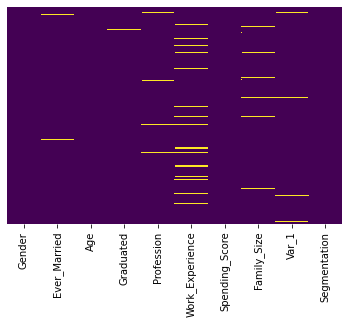

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
data.shape

(8068, 10)

**FILL MISSING DATA**

In [17]:
data['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [18]:
data['Ever_Married'] = data['Ever_Married'].fillna('No')

In [19]:
data.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [20]:
data['Graduated'].value_counts()

data['Graduated'] = data['Graduated'].fillna('No')

In [21]:
data['Profession'].dropna(how = 'any', inplace = True)

In [22]:
data.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [23]:
data['Profession'].isnull().sum()

124

In [24]:
data = data[data['Profession'].isnull() == False]

In [25]:
data.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    803
Spending_Score       0
Family_Size        323
Var_1               73
Segmentation         0
dtype: int64

In [26]:
data['Work_Experience'].value_counts()

1.0     2326
0.0     2282
9.0      471
8.0      454
2.0      279
3.0      252
4.0      252
6.0      202
7.0      193
5.0      191
10.0      52
11.0      49
12.0      47
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [27]:
data['Work_Experience'].describe()

count    7141.000000
mean        2.645008
std         3.409188
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [28]:
data['Work_Experience'] = data['Work_Experience'].fillna(7)

In [29]:
data.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        323
Var_1               73
Segmentation         0
dtype: int64

In [30]:
data['Family_Size'].describe()

count    7621.000000
mean        2.851332
std         1.530382
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [31]:
data['Family_Size'] = data['Family_Size'].fillna(3)

In [32]:
data.isnull().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              73
Segmentation        0
dtype: int64

In [33]:
data['Var_1'].value_counts()

Cat_6    5179
Cat_4    1057
Cat_3     804
Cat_2     420
Cat_7     196
Cat_1     131
Cat_5      84
Name: Var_1, dtype: int64

In [34]:
data = data[data['Var_1'].isnull() == False]

In [35]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [36]:
data.shape

(7871, 10)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7871 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7871 non-null   object 
 1   Ever_Married     7871 non-null   object 
 2   Age              7871 non-null   int64  
 3   Graduated        7871 non-null   object 
 4   Profession       7871 non-null   object 
 5   Work_Experience  7871 non-null   float64
 6   Spending_Score   7871 non-null   object 
 7   Family_Size      7871 non-null   float64
 8   Var_1            7871 non-null   object 
 9   Segmentation     7871 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 676.4+ KB


In [38]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,7.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,7.0,High,6.0,Cat_6,A


In [39]:
data['Profession'].value_counts()

Artist           2491
Healthcare       1317
Entertainment     943
Engineer          694
Doctor            683
Lawyer            617
Executive         594
Marketing         290
Homemaker         242
Name: Profession, dtype: int64

In [40]:
data['Spending_Score'].value_counts()

Low        4752
Average    1924
High       1195
Name: Spending_Score, dtype: int64

In [41]:
data['Segmentation'].value_counts()

D    2196
C    1932
A    1920
B    1823
Name: Segmentation, dtype: int64

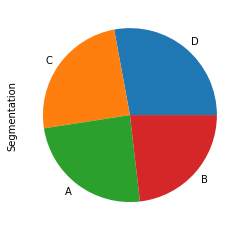

In [42]:
data['Segmentation'].value_counts().plot.pie()

**CATEGORICAL DATA**

In [43]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [44]:
categorical_features = data.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 7


In [45]:
data[categorical_features]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8062,Male,Yes,Yes,Artist,High,Cat_6,B
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


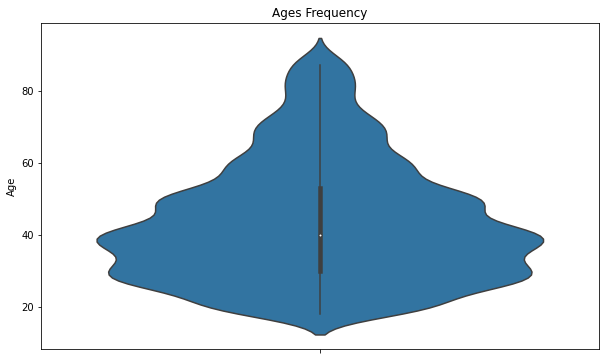

In [46]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["Age"])
plt.show()

**SEGMENTATION**

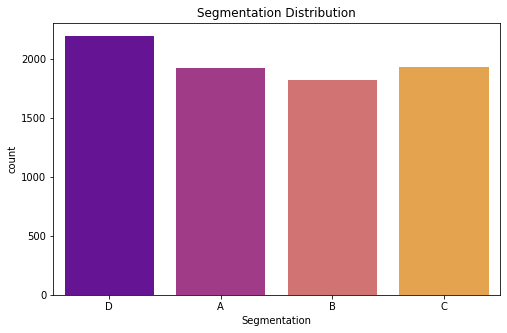

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segmentation', data=data, palette='plasma')
plt.title("Segmentation Distribution")
plt.show()

Socio-Demographic Segmentation

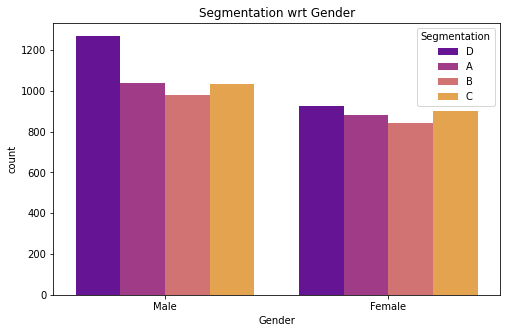

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Gender")
plt.show()



*   Male and Female counts are highest in segmentation D 
*   Male and Female counts are lowest in segmentation B



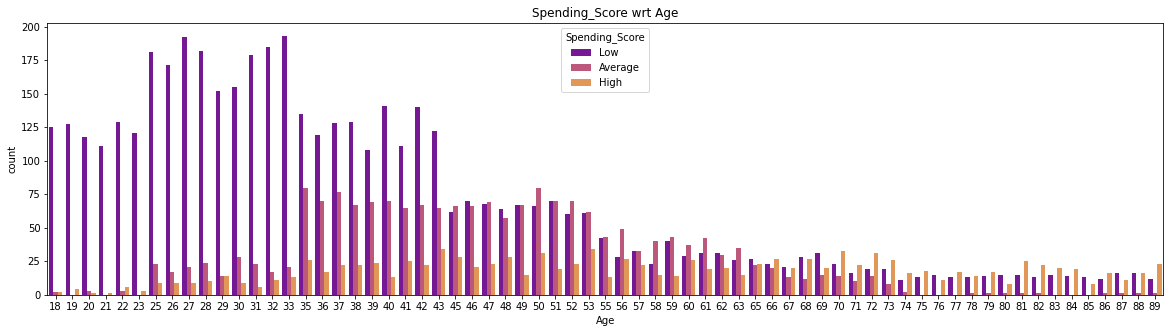

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',hue='Spending_Score', data=data, palette='plasma')
plt.title("Spending_Score wrt Age")
plt.show()

Here we observed that the spending of younger customers is low compared to the elder customers.

If we analyse the spending score vs family size , we can see

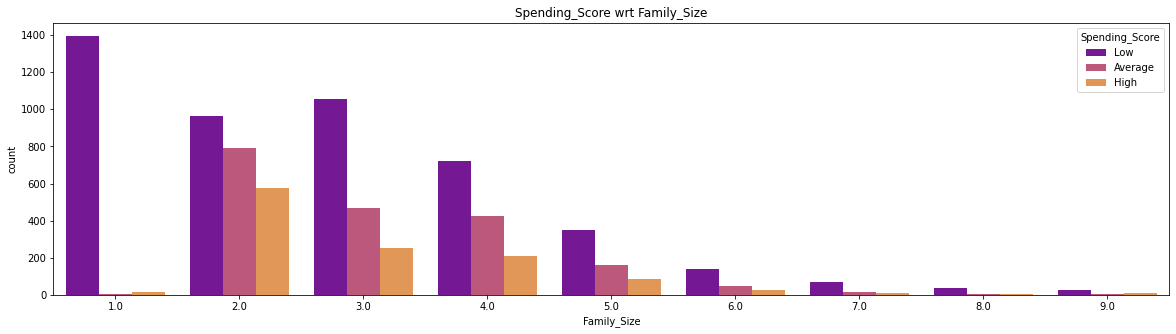

In [50]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family_Size',hue='Spending_Score', data=data, palette='plasma')
plt.title("Spending_Score wrt Family_Size")
plt.show()

Clearly we can see customers having 2 to 5 family members have good spending scores compared to singles which have low spending scores which is understandable.

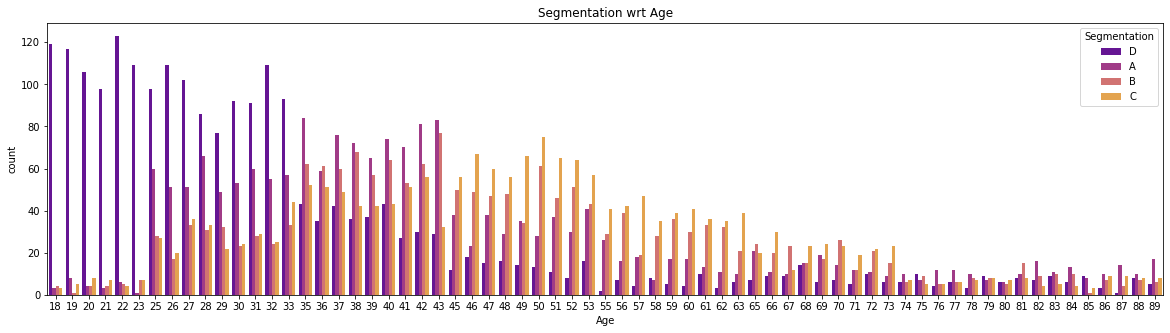

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Age")
plt.show()


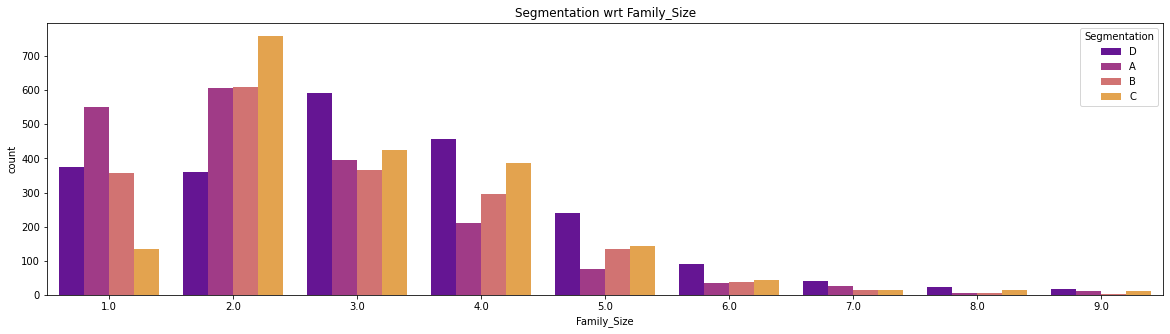

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family_Size',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Family_Size")
plt.show()

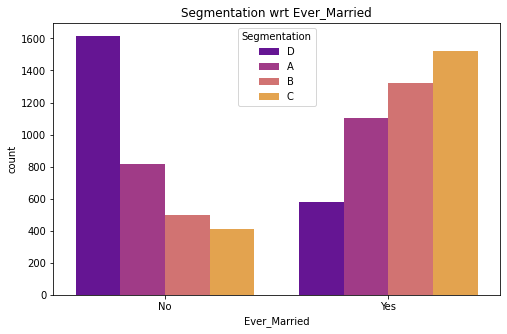

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Ever_Married',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Ever_Married")
plt.show()


*   Married people are mostly part of segmentation C
*   Unmarried people are mostly part of segmentation D



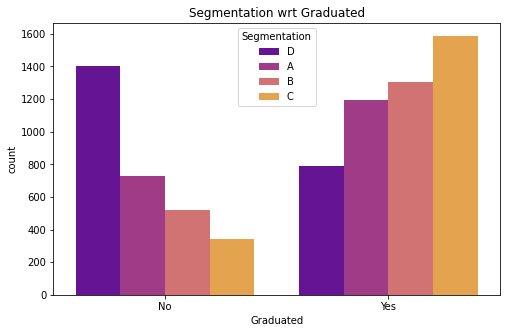

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='Graduated',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Graduated")
plt.show()



*   Graduated People are mostly part of Segmentation C.
*   Non-graduates are mostly part of segmenation D.



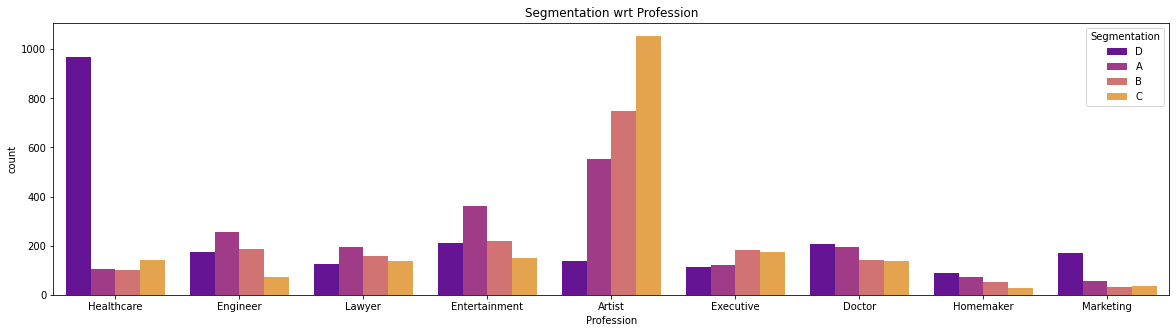

In [55]:
plt.figure(figsize=(20,5))
sns.countplot(x='Profession',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Profession")
plt.show()


*   Healthcare Workers are mostly part of Segmentation D 
*   Artists are mostly part of Segmentation C



Behavioural Segmentation

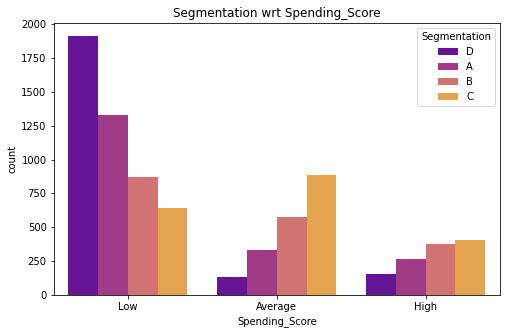

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='Spending_Score',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Spending_Score")
plt.show()


*   People with low spending score are mostly part of Segmentation D
*   People with average spending score are mostly part of Segmentation C
*   People with high spending score are mostly part of Segmentation B and C


In [57]:
data['Var_1'].value_counts()

Cat_6    5179
Cat_4    1057
Cat_3     804
Cat_2     420
Cat_7     196
Cat_1     131
Cat_5      84
Name: Var_1, dtype: int64

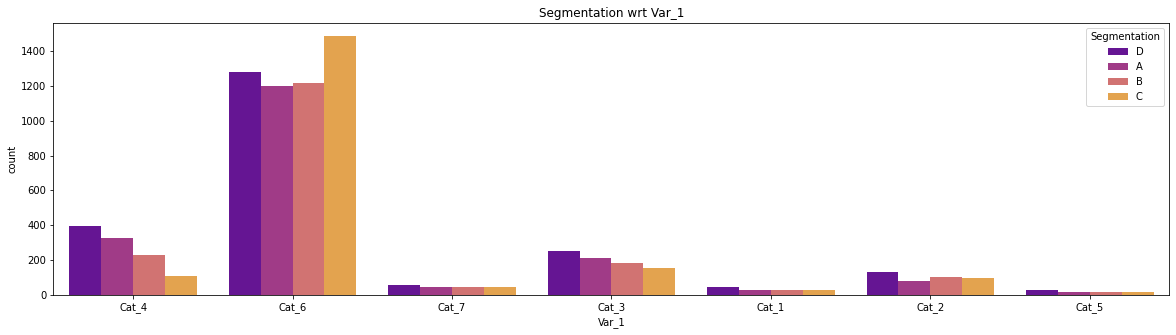

In [58]:
plt.figure(figsize=(20,5))
sns.countplot(x='Var_1',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Var_1")
plt.show()

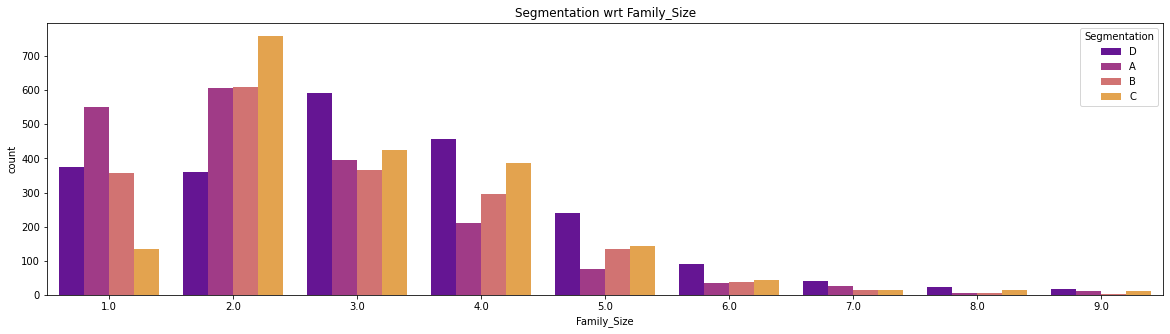

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family_Size',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Family_Size")
plt.show()

 Psychographic Segmentation

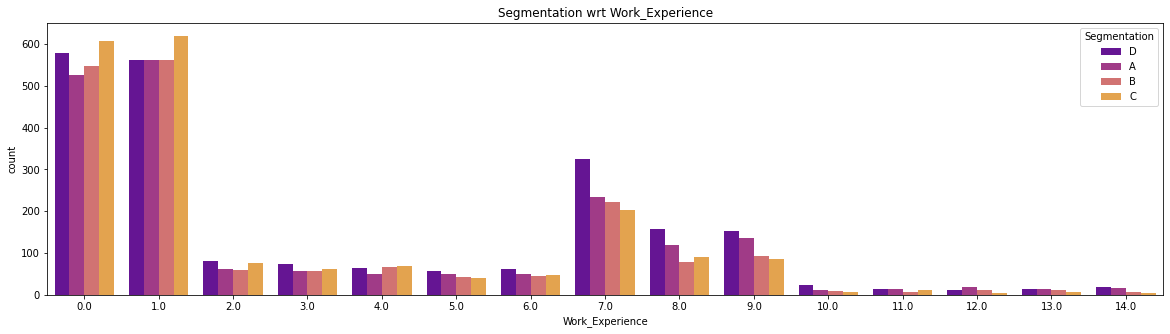

In [60]:
plt.figure(figsize=(20,5))
sns.countplot(x='Work_Experience',hue='Segmentation', data=data, palette='plasma')
plt.title("Segmentation wrt Work_Experience")
plt.show()

In [61]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,7.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,7.0,High,6.0,Cat_6,A


**ENCODING CATEGORICAL DATA**

In [62]:
from sklearn import preprocessing

def Labelencode(column):
    
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column])

    return

In [63]:
object_col = ['Gender', 'Ever_Married', 'Graduated', 'Profession','Work_Experience','Spending_Score', 'Var_1', 'Segmentation']

for col in object_col:
    Labelencode(col)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7871 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7871 non-null   int64  
 1   Ever_Married     7871 non-null   int64  
 2   Age              7871 non-null   int64  
 3   Graduated        7871 non-null   int64  
 4   Profession       7871 non-null   int64  
 5   Work_Experience  7871 non-null   int64  
 6   Spending_Score   7871 non-null   int64  
 7   Family_Size      7871 non-null   float64
 8   Var_1            7871 non-null   int64  
 9   Segmentation     7871 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 996.4 KB


In [65]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4.0,3,3
1,0,1,38,1,2,7,0,3.0,3,0
2,0,1,67,1,2,1,2,1.0,5,1
3,1,1,67,1,7,0,1,2.0,5,1
4,0,1,40,1,3,7,1,6.0,5,0


In [67]:
X=data.iloc[:,1:]
X

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,22,0,5,1,2,4.0,3,3
1,1,38,1,2,7,0,3.0,3,0
2,1,67,1,2,1,2,1.0,5,1
3,1,67,1,7,0,1,2.0,5,1
4,1,40,1,3,7,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...
8062,1,41,1,0,0,1,5.0,5,1
8064,0,35,0,4,3,2,4.0,3,3
8065,0,33,1,5,1,2,1.0,5,3
8066,0,27,1,5,1,2,4.0,5,1


**K-MEANS CLUSTERING**

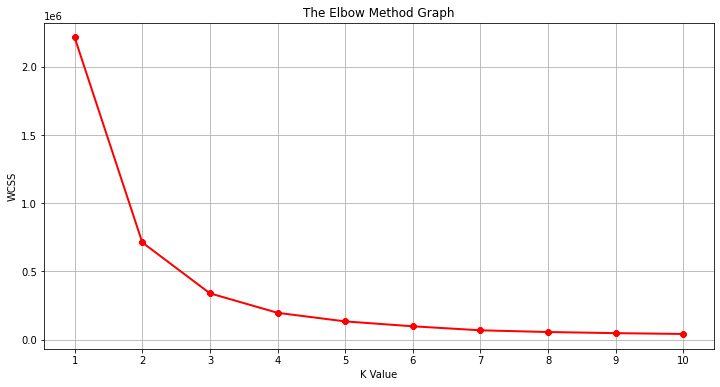

In [87]:
from sklearn.cluster import KMeans
X2=data[["Age","Segmentation","Spending_Score"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()




In [89]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(X2)
data["label"] = clusters
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,label
0,1,0,22,0,5,1,2,4.0,3,3,2
1,0,1,38,1,2,7,0,3.0,3,0,1
2,0,1,67,1,2,1,2,1.0,5,1,0
3,1,1,67,1,7,0,1,2.0,5,1,0
4,0,1,40,1,3,7,1,6.0,5,0,1


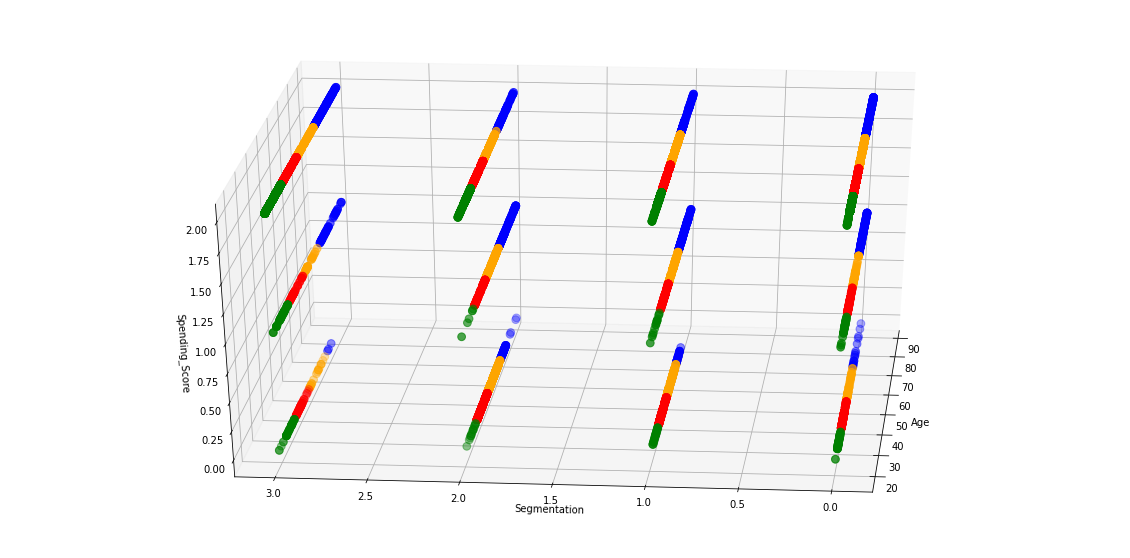

In [90]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Segmentation"][data.label == 0], data["Spending_Score"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Segmentation"][data.label == 1], data["Spending_Score"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Segmentation"][data.label == 2], data["Spending_Score"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Segmentation"][data.label == 3], data["Spending_Score"][data.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Segmentation")
ax.set_zlabel('Spending_Score')
plt.show()

Here we can see 4 clusters based on Age, Segmentation and Spending_Score behaviours.

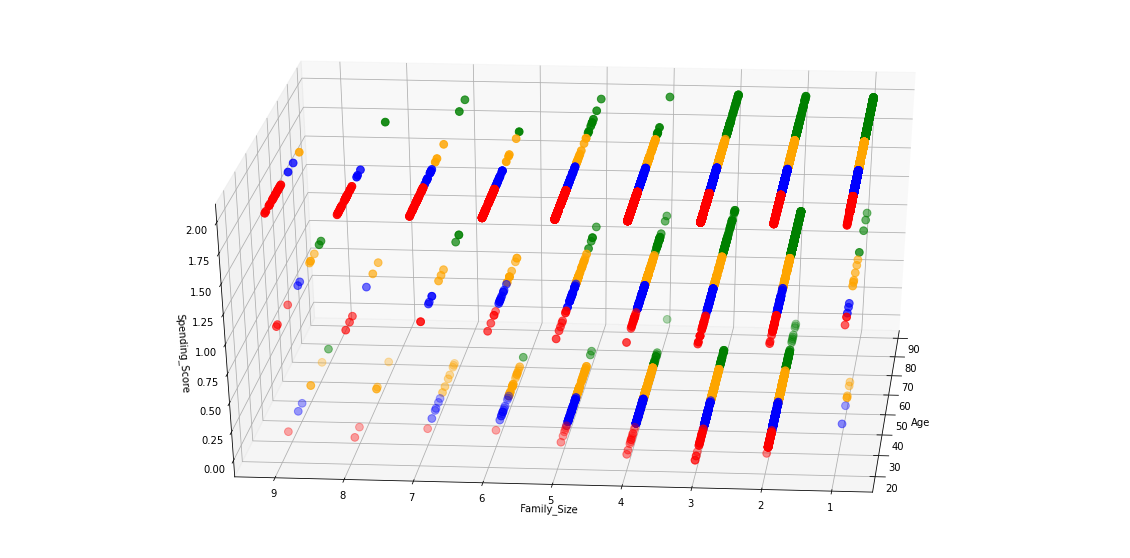

In [83]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Family_Size"][data.label == 0], data["Spending_Score"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Family_Size"][data.label == 1], data["Spending_Score"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Family_Size"][data.label == 2], data["Spending_Score"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Family_Size"][data.label == 3], data["Spending_Score"][data.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Family_Size")
ax.set_zlabel('Spending_Score')
plt.show()

Here we can see 4 clusters based on Age, Family_Size and Spending_Score
behaviours.

In [91]:
X = data.drop('Segmentation', axis = 1)
y = data['Segmentation']

In [92]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,label
0,1,0,22,0,5,1,2,4.0,3,2
1,0,1,38,1,2,7,0,3.0,3,1
2,0,1,67,1,2,1,2,1.0,5,0
3,1,1,67,1,7,0,1,2.0,5,0
4,0,1,40,1,3,7,1,6.0,5,1


In [93]:
data.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'label'],
      dtype='object')

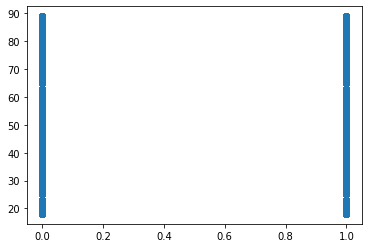

In [94]:
import matplotlib.pyplot as plt

plt.scatter(data['Gender'], data['Age'])

In [ ]:
X.corr()

In [ ]:
data.head()

**TRAIN-TEST SPLIT**

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 54)

In [96]:
X_test.fillna(X_test.mean())


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,label
4692,0,1,45,1,0,1,1,5.0,5,1
5008,0,0,31,0,5,0,2,5.0,1,2
4607,1,0,21,0,5,7,2,4.0,2,2
6449,1,1,69,1,4,0,2,2.0,3,0
1717,1,1,65,0,0,0,0,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...
3765,1,0,19,0,4,13,2,3.0,6,2
405,1,1,47,1,0,0,0,6.0,6,1
4543,0,1,40,1,2,1,0,6.0,3,1
3739,0,1,37,1,0,3,0,3.0,2,1


**Training the Random Forest Classification model on Training set**



In [97]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

**Predicting Test Set Result**

In [98]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 3, 3, ..., 1, 1, 3])

**Confusion Matrix**

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[220 113  62 102]
 [109 142 137  54]
 [ 57 113 220  66]
 [117  44  32 380]]


0.4888211382113821

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [101]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [102]:
# first check the accuracy score on without scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression   0.4842479674796748
SVC   0.46697154471544716
KNeighborsClassifier   0.4507113821138211
DecisionTreeClassifier   0.421239837398374
RandomForestClassifier   0.483739837398374


In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

prediction = xgb.predict(X_test)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.5345528455284553


Thus, we get accuracy of 53.45% using XGBClassifier